# Continuous Control

---

In this notebook, an implementation of a **_DDPG (Deep Deterministic Policy Gradients)_** agent to solve the Unity's "Reacher" ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program is given.


Run the next code cell to install a few packages. This line will take a few minutes to run!

In [1]:
#!pip -q install ./python

### 1. Import the Necessary Packages

We begin by importing the necessary packages.  

If the code cell below returns an error, please double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from unityagents import UnityEnvironment
import numpy as np
#from workspace_utils import active_session

### 2. Start the Environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print('Brain Name:', brain_name)

Brain Name: ReacherBrain


### 3. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 4. Take Random Actions in the Environment

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

# Deep Deterministic Policy Gradients (DDPG)
---
We train DDPG with Unity's Reacher environment.

### 5. Instantiate the Agent

Initialize the agent in the code cell below.

In [7]:
from ddpg_agent import Agent

agent = Agent(state_size=33, action_size=4, num_agents=num_agents, random_seed=2)

### 6. Examine the Models 

Run the code cell below to print some information about the actor and critic models.

In [8]:
print(agent.actor_local)

Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=4, bias=True)
)


In [9]:
print(agent.actor_target)

Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=4, bias=True)
)


In [10]:
print(agent.critic_local)

Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


In [11]:
print(agent.critic_target)

Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


### 7. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

Define the function to train the agent from scratch. 

Please note that when training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [12]:
def ddpg(n_episodes=400, max_t=1000):
    """Deep Deterministic Policy Gradients (DDPG).
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    solved = False
    scores_window = deque(maxlen=100)                      # last 100 averaged (over all agents) scores
    scores = []                                            # list containing scores from each episode
    
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        states = env_info.vector_observations              # get the current state (for each agent)
        
        agent.reset()                                      # reset the agent
        agent_scores = np.zeros(num_agents)                # initialize the score (for each agent)
        
        for t in range(max_t):
            actions = agent.act(states)                    # select an action (for each agent)
            
            env_info = env.step(actions)[brain_name]       # send all actions to tne environment
            
            next_states = env_info.vector_observations     # get next state (for each agent)
            rewards = env_info.rewards                     # get reward (for each agent)
            dones = env_info.local_done                    # see if episode has finished
            
            agent.step(states, actions, rewards, next_states, dones, t) # learn
            
            states = next_states                           # roll over the state to next time step
            agent_scores += rewards                        # update the score (for each agent)
            if np.any(dones):                              # exit loop if episode finished
                break 
                
        score = np.mean(agent_scores)                      # calculate episode score as average of agent scores
                
        scores_window.append(score)                        # save most recent score
        scores.append(score)                               # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}\tLast Episode Score: {:.2f}\tLast Episode Max Score (Agent): {:.2f}\tMax Score (Window): {:.2f}\tMax Score (Overall): {:.2f}'.format(i_episode, np.mean(scores_window), score, np.max(agent_scores), np.max(scores_window), np.max(scores)), end="")                                                                                 
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}\tLast Episode Score: {:.2f}\tLast Episode Max Score (Agent): {:.2f}\tMax Score (Window): {:.2f}\tMax Score (Overall): {:.2f}'.format(i_episode, np.mean(scores_window), score, np.max(agent_scores), np.max(scores_window), np.max(scores))) 
            print('\n')
        if np.mean(scores_window)>=30.0 and not solved:
            print('\n\nEnvironment solved in {:d} episodes!'.format(i_episode))
            #print('\nAverage Score: {:.2f}\tMax Score (Window): {:.2f}\tMax Score (Overall): {:.2f}'.format(np.mean(scores_window), np.mean(scores_window), np.max(scores)))
            print('\n')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            solved = True
            #break
    return scores


In [13]:
scores = ddpg()

Episode 100	Average Score: 5.03	Last Episode Score: 12.10	Last Episode Max Score (Agent): 19.44	Max Score (Window): 12.99	Max Score (Overall): 12.99


Episode 200	Average Score: 18.61	Last Episode Score: 26.17	Last Episode Max Score (Agent): 31.14	Max Score (Window): 28.80	Max Score (Overall): 28.80


Episode 294	Average Score: 30.01	Last Episode Score: 34.94	Last Episode Max Score (Agent): 39.60	Max Score (Window): 35.52	Max Score (Overall): 35.52

Environment solved in 294 episodes!


Episode 300	Average Score: 30.55	Last Episode Score: 36.89	Last Episode Max Score (Agent): 39.27	Max Score (Window): 36.89	Max Score (Overall): 36.89


Episode 400	Average Score: 36.47	Last Episode Score: 36.59	Last Episode Max Score (Agent): 38.74	Max Score (Window): 38.70	Max Score (Overall): 38.70




In [14]:
#with active_session():
#    # do long-running work here
#    scores = ddpg()

### 8.  Plot the Scores

Figure shows how the agent’s score evolves

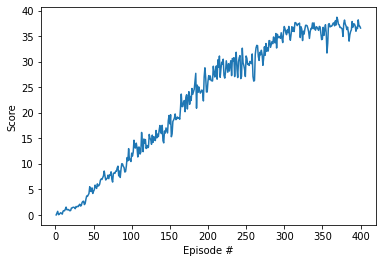

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 9. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [16]:
# load the weights from file
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations              # get the current state (for each agent)     
scores = np.zeros(num_agents)                      # initialize the score (for each agent)
    
while True:
    actions = agent.act(states)                    # select an action (for each agent)
        
    env_info = env.step(actions)[brain_name]       # send all actions to the environment
    next_states = env_info.vector_observations     # get next state (for each agent)
    rewards = env_info.rewards                     # get reward (for each agent)
    dones = env_info.local_done                    # see if episode has finished
        
    scores += rewards                              # update the score
    states = next_states                           # roll over the state to next time step
    if np.any(dones):                              # exit loop if episode finished
        break
    
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
        

Total score (averaged over agents) this episode: 37.06149917161092


### 10. Close the Environment

When finished, you can close the environment.

In [ ]:
env.close()